# Testing boosting methods

_This notebook was developed by Ana Filipa Carvalho._

This jupyter notebook is the last part of a series of notebooks that contain code to generate the results of this [REFERENCE] paper. Here we focus on boosting probabilities.

For that, there are two options:
1. Modified an adjancency matrix: play with the random epsilon value in *is_isomorphic_p()* (or *is_isomorphic_l()*) function.
2. Hacking the adjacency matrix: multiplying a column of the matrix corresponding to the node with lowest connectivity by a value $w$.

As usual, we will start with some imports and the auxiliary functions.

In [4]:
import numpy as np
import networkx as nx

import perceval as pcvl
from perceval.algorithm import Sampler
import perceval.components as comp

import quandelibc as qc

import importlib

In [5]:
A = np.array([[0, 1, 1, 1, 1, 0],
              [1, 0, 1, 1, 1, 1],
              [1, 1, 0, 1, 1, 0],
              [1, 1, 1, 0, 1, 0],
              [1, 1, 1, 1, 0, 0],
              [0, 1, 0, 0, 0, 0]])

Import of the file with the basic and auxiliary functions.

In [6]:
import functions

Here we define again *perm_estimation()* function because there is a detail to consider when boosting by hacking the adjacency matrix and here it prints a warning.

In [10]:
def perm_estimation(G, nb_samples, Ns_min=0):
    if Ns_min == 0:
        Ns_min = nb_samples

    if type(G) == type(nx.Graph()):  # if we input the graph directly instead of the matrix, NetworkX will output a slightly different matrix leading to wrong results!
        m = G.number_of_nodes()
        print("Inputing a graph from a modified adjacency matrix might lead to wrong results! We advice to use the adjacency matrix directly.")
    else:
        m = len(G)
    #print("number of nodes", m); print(inputState)
    in_state = functions.input_state(m)

    U, c = functions.to_unitary(G)
    U_matrix_pcvl = pcvl.Matrix(U)
    unitary_component = comp.Unitary(U_matrix_pcvl)
    proc = pcvl.Processor("CliffordClifford2017", unitary_component)
    proc.with_input(pcvl.BasicState(in_state))

    samples_accepted = []
    i = 0
    sampler = Sampler(proc)
    while len(samples_accepted) < Ns_min:
        L = list(sampler.samples(nb_samples)['results'])
        # samples_accepted.append(L)
        # samples_accepted = functions.post_select(samples_accepted)
        samples_accepted += functions.post_select(L)
        #if (i%10) == 0: print("iteration", i, "samples post-selected", len(samples_accepted))
        i = i+1
    print("Total number of samples: ", nb_samples*i)
    print("Number of samples post:", len(samples_accepted))
    perm = (c**m)*np.sqrt(len(samples_accepted)/(nb_samples*i))
    return perm

## Hacking the adjacency matrix

Here you can test the effect of hacking the adjacency matrix. Be carefull how you handle this, NetworkX might not handle very well this type of modified adjacency matrices.

Here we test for the graph on the following cell:

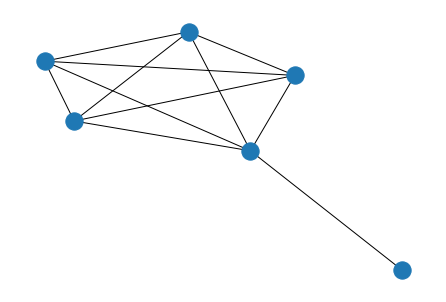

In [8]:
A = np.array([[0, 1, 1, 1, 1, 0],
              [1, 0, 1, 1, 1, 1],
              [1, 1, 0, 1, 1, 0],
              [1, 1, 1, 0, 1, 0],
              [1, 1, 1, 1, 0, 0],
              [0, 1, 0, 0, 0, 0]])
nx.draw(nx.from_numpy_array(A))

In [11]:
%%time
B = np.copy(A)
B[5] = B[5]*1
perm_estimation(B, 10000, Ns_min=100)/1

Total number of samples:  25940000
Number of samples post: 100
CPU times: user 1h 23min 7s, sys: 2.87 s, total: 1h 23min 10s
Wall time: 1h 23min 25s


8.682188077969531

In [12]:
%%time
B = np.copy(A)
B[5] = B[5]*2
a = perm_estimation(B, 100)/2
print(a)

Total number of samples:  8030700
Number of samples post: 100
8.934562694342244
CPU times: user 25min 58s, sys: 1.23 s, total: 25min 59s
Wall time: 26min 4s


In [15]:
%%time
B = np.copy(A)
B[5] = B[5]*3
a = perm_estimation(B, 100)/3
print(a)

Total number of samples:  6300200
Number of samples post: 100
9.270049452732472
CPU times: user 19min 56s, sys: 1.24 s, total: 19min 58s
Wall time: 20min 8s


In [16]:
%%time
B = np.copy(A)
B[5] = B[5]*4
a = perm_estimation(B, 100)/4
print(a)

Total number of samples:  15262200
Number of samples post: 100
8.295127763375197
CPU times: user 48min 51s, sys: 2.94 s, total: 48min 54s
Wall time: 49min 19s


In [13]:
%%time
B = np.copy(A)
B[5] = B[5]*5
a = perm_estimation(B, 100)/5
print(a)

Total number of samples:  40049000
Number of samples post: 100
9.42719789842458
CPU times: user 2h 9min 37s, sys: 6.29 s, total: 2h 9min 43s
Wall time: 2h 10min 9s


The results from these last cells reproduce the results for the boosting table in the paper. 

Here we focused on hacking the adjacency matrix as it is the main point for boosting and leave the second method of boosting (varying epsilon values) to the reader to test. This concludes this series of notebooks.